# 1. Universal Approximation Theorem

## (a) Simple function f : R → R, with 1 input and 1 output, and say, 50 hidden neurons with a ReLU activation function. SGD optimizer with 100 epochs
I have used f(x) = X^2 here.

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [2]:
torch.manual_seed(1)    

x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)  # data size 1000
y = x.pow(2) + 0.2*torch.rand(x.size())                 

x, y = Variable(x), Variable(y)

In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

# 50 hidden neurons
net = Net(n_feature=1, n_hidden=50, n_output=1)     # define the network

#SGD
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  

In [6]:
# train the network
for t in range(100):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    print('Loss: {:+.6f} after {} batches'.format(loss, t))
    

Loss: +0.030116 after 0 batches
Loss: +0.029148 after 1 batches
Loss: +0.028209 after 2 batches
Loss: +0.027299 after 3 batches
Loss: +0.026417 after 4 batches
Loss: +0.025563 after 5 batches
Loss: +0.024738 after 6 batches
Loss: +0.023940 after 7 batches
Loss: +0.023170 after 8 batches
Loss: +0.022426 after 9 batches
Loss: +0.021710 after 10 batches
Loss: +0.021020 after 11 batches
Loss: +0.020355 after 12 batches
Loss: +0.019715 after 13 batches
Loss: +0.019099 after 14 batches
Loss: +0.018506 after 15 batches
Loss: +0.017937 after 16 batches
Loss: +0.017390 after 17 batches
Loss: +0.016864 after 18 batches
Loss: +0.016360 after 19 batches
Loss: +0.015876 after 20 batches
Loss: +0.015412 after 21 batches
Loss: +0.014967 after 22 batches
Loss: +0.014540 after 23 batches
Loss: +0.014132 after 24 batches
Loss: +0.013741 after 25 batches
Loss: +0.013367 after 26 batches
Loss: +0.013009 after 27 batches
Loss: +0.012666 after 28 batches
Loss: +0.012338 after 29 batches
Loss: +0.012025 afte

## (b) approximation of f(x) = sin x with hidden layer of 50 neurons,  ReLU activation, 500 epochs & Adam optimizer

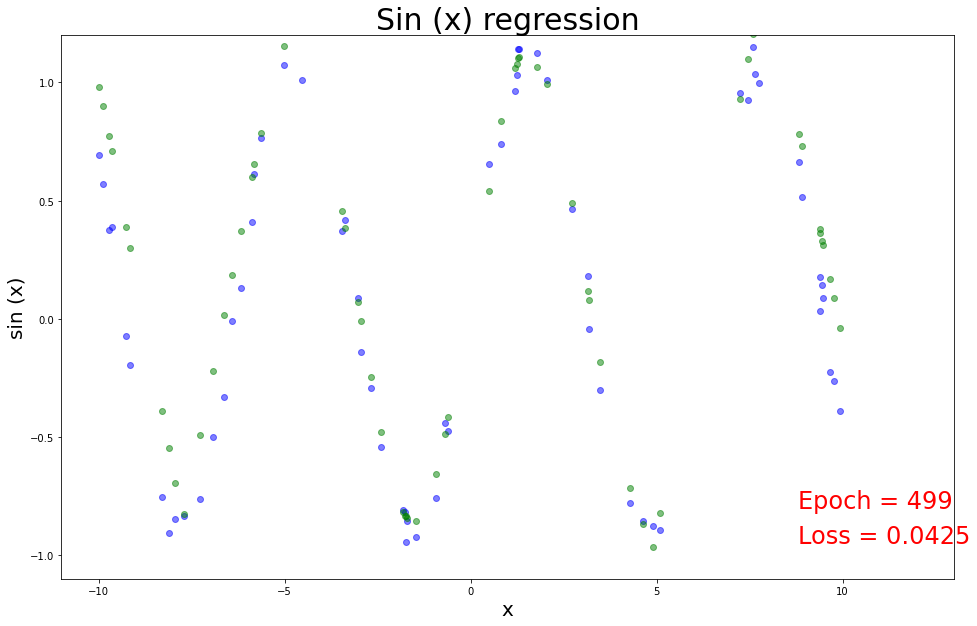

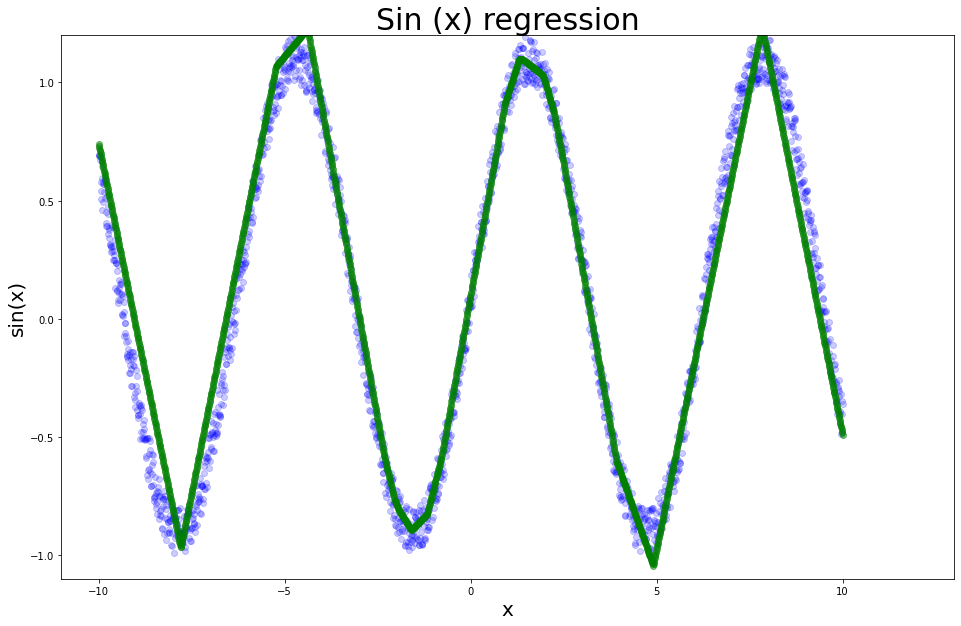

In [14]:
x = torch.unsqueeze(torch.linspace(-10, 10, 2000), dim=1)  # data size 2000
y = torch.sin(x) + 0.2*torch.rand(x.size())                 

x, y = Variable(x), Variable(y)

#
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

# define the network
net = Net(n_feature=1, n_hidden=50, n_output=1)     

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  

#
BATCH_SIZE = 64
EPOCH = 500

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

fig, ax = plt.subplots(figsize=(16,10))

# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     

        loss = loss_func(prediction, b_y)     

        optimizer.zero_grad()  
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()       

        if step == 1:
           # plot for each step
            plt.cla()
            ax.set_title('Sin (x) regression', fontsize=30)
            ax.set_xlabel('x', fontsize=20)
            ax.set_ylabel('sin (x)', fontsize=20)
            ax.set_xlim(-11.0, 13.0)
            ax.set_ylim(-1.1, 1.2)
            ax.scatter(b_x.data.numpy(), b_y.data.numpy(), color = "blue", alpha=0.5)
            ax.scatter(b_x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
            ax.text(8.8, -0.8, 'Epoch = %d' % epoch,
                    fontdict={'size': 24, 'color':  'red'})
            ax.text(8.8, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                    fontdict={'size': 24, 'color':  'red'})


fig, ax = plt.subplots(figsize=(16,10))
plt.cla()
ax.set_title('Sin (x) regression', fontsize=30)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('sin(x)', fontsize=20)
ax.set_xlim(-11.0, 13.0)
ax.set_ylim(-1.1, 1.2)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
prediction = net(x)     # input x and predict based on x
ax.scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
plt.show()

## (c) approximation behaviour w.r.t number of neurons, 100 epochs & Adam Optimizer

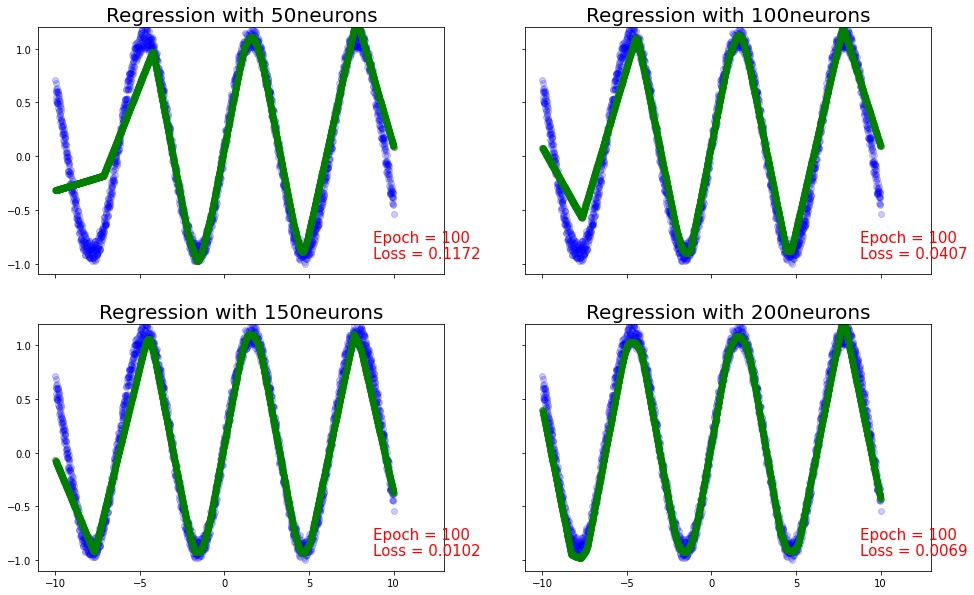

In [17]:
x = torch.unsqueeze(torch.linspace(-10, 10, 2000), dim=1)  # data size 2000
y = torch.sin(x) + 0.2*torch.rand(x.size())                 
 

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)


#
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

numOfNeurons = np.array([50, 100, 150, 200])
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(16,10))
plt.cla()
net_lst = []
loss_lst = []

for cnt in range(len(numOfNeurons)):
  net = Net(n_feature=1, n_hidden=numOfNeurons[cnt], n_output=1)     # define the network
  # print(net)  # net architecture
  optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
  loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

  #
  BATCH_SIZE = 64
  EPOCH = 100

  torch_dataset = Data.TensorDataset(x, y)

  loader = Data.DataLoader(
      dataset=torch_dataset, 
      batch_size=BATCH_SIZE, 
      shuffle=True, num_workers=2,)


  # start training
  for epoch in range(EPOCH):
      for step, (batch_x, batch_y) in enumerate(loader): # for each training step
          
          b_x = Variable(batch_x)
          b_y = Variable(batch_y)

          prediction = net(b_x)     # input x and predict based on x

          loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

          optimizer.zero_grad()   # clear gradients for next train
          loss.backward()         # backpropagation, compute gradients
          optimizer.step()        # apply gradients


  
  net_lst.append(net)
  loss_lst.append(loss)

  
ax[0][0].set_title('Regression with ' + str(50) + 'neurons', fontsize=20)
ax[0][0].set_xlim(-11.0, 13.0)
ax[0][0].set_ylim(-1.1, 1.2)
ax[0][1].set_title('Regression with ' + str(100) + 'neurons', fontsize=20)
ax[0][1].set_xlim(-11.0, 13.0)
ax[0][1].set_ylim(-1.1, 1.2)
ax[1][0].set_title('Regression with ' + str(150) + 'neurons', fontsize=20)
ax[1][0].set_xlim(-11.0, 13.0)
ax[1][0].set_ylim(-1.1, 1.2)
ax[1][1].set_title('Regression with ' + str(200) + 'neurons', fontsize=20)
ax[1][1].set_xlim(-11.0, 13.0)
ax[1][1].set_ylim(-1.1, 1.2)
#ax.set_xlabel('x', fontsize=20)
#ax.set_ylabel('Sin (x)', fontsize=20)

ax[0][0].scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
ax[0][1].scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
ax[1][0].scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
ax[1][1].scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)

prediction = net_lst[0](x)     # input x and predict based on x
ax[0][0].scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)

prediction = net_lst[1](x)     # input x and predict based on x
ax[0][1].scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)

prediction = net_lst[2](x)     # input x and predict based on x
ax[1][0].scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)

prediction = net_lst[3](x)     # input x and predict based on x
ax[1][1].scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)


ax[0][0].text(8.8, -0.8, 'Epoch = %d' % EPOCH,
                    fontdict={'size': 15, 'color':  'red'})
ax[0][0].text(8.8, -0.95, 'Loss = %.4f' % loss_lst[0].data.numpy(),
                    fontdict={'size': 15, 'color':  'red'})
            
ax[0][1].text(8.8, -0.8, 'Epoch = %d' % EPOCH,
                    fontdict={'size': 15, 'color':  'red'})
ax[0][1].text(8.8, -0.95, 'Loss = %.4f' % loss_lst[1].data.numpy(),
                    fontdict={'size': 15, 'color':  'red'})

ax[1][0].text(8.8, -0.8, 'Epoch = %d' % EPOCH,
                    fontdict={'size': 15, 'color':  'red'})
ax[1][0].text(8.8, -0.95, 'Loss = %.4f' % loss_lst[2].data.numpy(),
                    fontdict={'size': 15, 'color':  'red'})

ax[1][1].text(8.8, -0.8, 'Epoch = %d' % EPOCH,
                    fontdict={'size': 15, 'color':  'red'})
ax[1][1].text(8.8, -0.95, 'Loss = %.4f' % loss_lst[3].data.numpy(),
                    fontdict={'size': 15, 'color':  'red'})            

plt.show()


## (d) changed the ReLU activation to sigmoid, f(x) = sin x with hidden layer of 50 neurons, 500 epochs & Adam optimizer

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


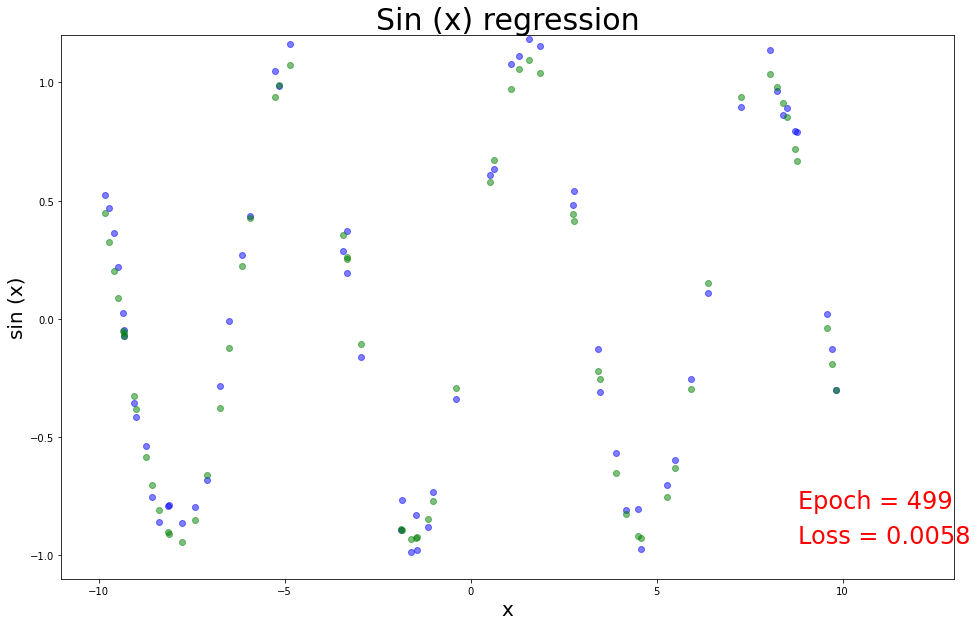

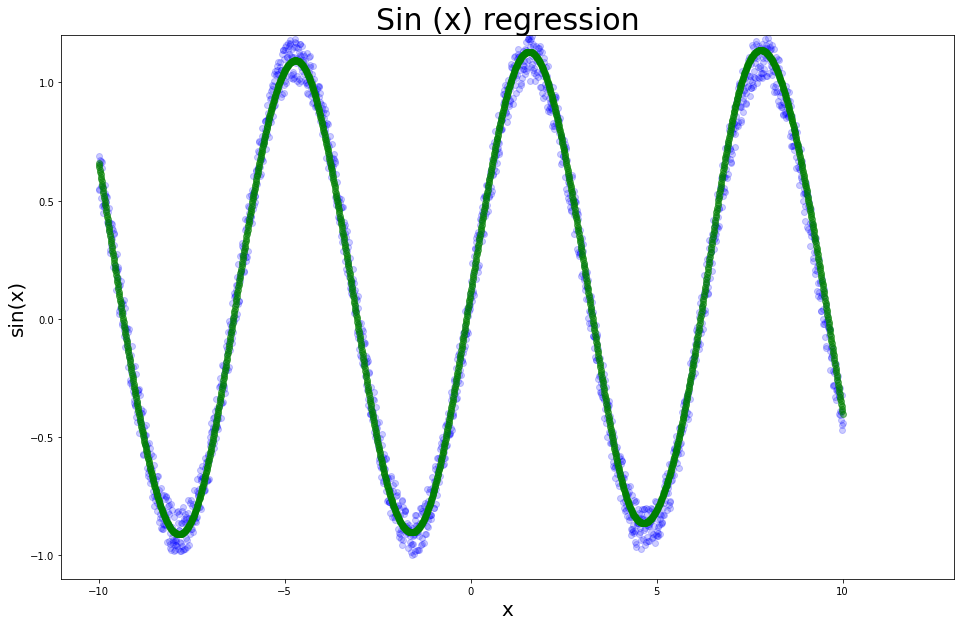

In [18]:
x = torch.unsqueeze(torch.linspace(-10, 10, 2000), dim=1)  # data size 2000
y = torch.sin(x) + 0.2*torch.rand(x.size())                 
 
x, y = Variable(x), Variable(y)

#
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.sigmoid(self.hidden(x))      
        x = self.predict(x)             # linear output
        return x


net = Net(n_feature=1, n_hidden=50, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  

#
BATCH_SIZE = 64
EPOCH = 500

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

my_images = []
fig, ax = plt.subplots(figsize=(16,10))

# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)    

        loss = loss_func(prediction, b_y)     

        optimizer.zero_grad()   
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        

        if step == 1:
           # plot for each step
            plt.cla()
            ax.set_title('Sin (x) regression', fontsize=30)
            ax.set_xlabel('x', fontsize=20)
            ax.set_ylabel('sin (x)', fontsize=20)
            ax.set_xlim(-11.0, 13.0)
            ax.set_ylim(-1.1, 1.2)
            ax.scatter(b_x.data.numpy(), b_y.data.numpy(), color = "blue", alpha=0.5)
            ax.scatter(b_x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
            ax.text(8.8, -0.8, 'Epoch = %d' % epoch,
                    fontdict={'size': 24, 'color':  'red'})
            ax.text(8.8, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                    fontdict={'size': 24, 'color':  'red'})


fig, ax = plt.subplots(figsize=(16,10))
plt.cla()
ax.set_title('Sin (x) regression', fontsize=30)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('sin(x)', fontsize=20)
ax.set_xlim(-11.0, 13.0)
ax.set_ylim(-1.1, 1.2)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
prediction = net(x)     # input x and predict based on x
ax.scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
plt.show()

## (e) one more function f(x) = x ^ 3, with 1 input, 1 output, and 1 hidden layer of 50 neurons with a ReLU activation function. Adam optimizer with 100 epochs



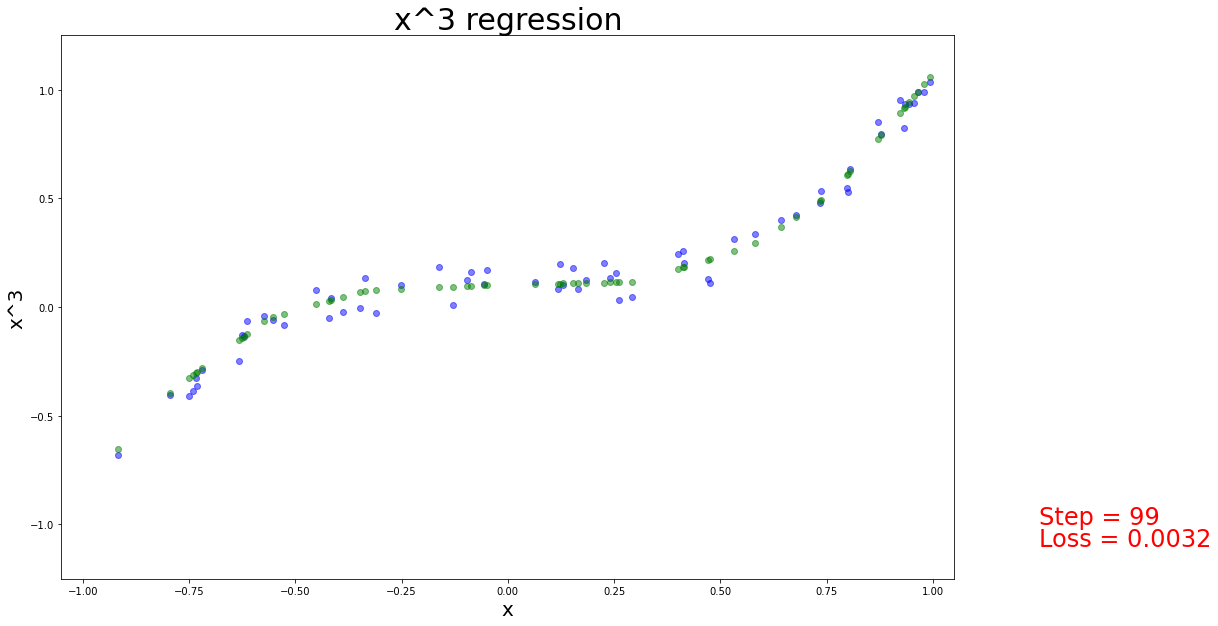

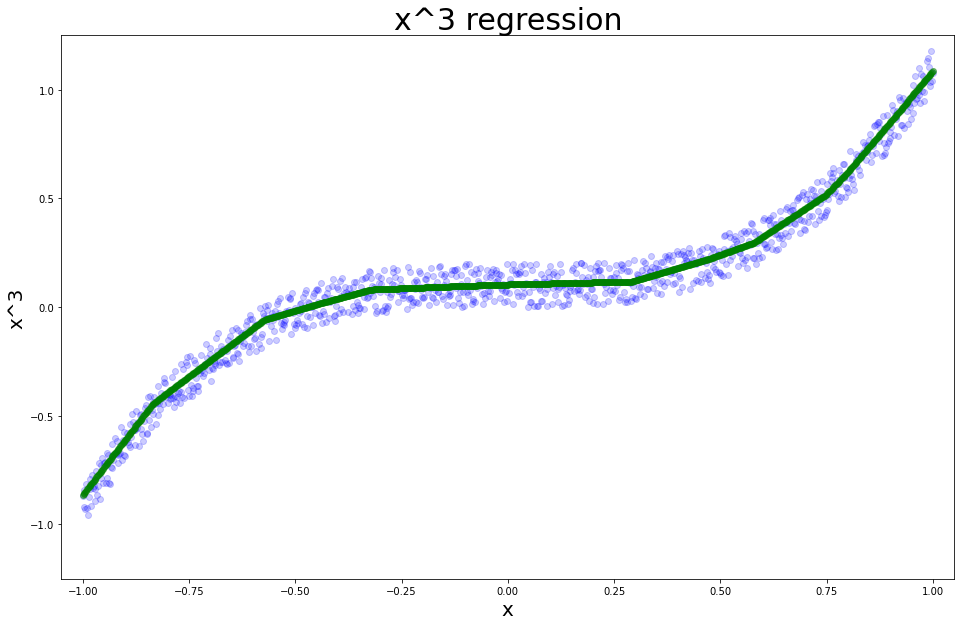

In [26]:
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)  # data size 2000
y = x.pow(3) + 0.2*torch.rand(x.size())                 

x, y = Variable(x), Variable(y)

#
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

# define the network
net = Net(n_feature=1, n_hidden=50, n_output=1)     

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  

#
BATCH_SIZE = 64
EPOCH = 200

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

fig, ax = plt.subplots(figsize=(16,10))

# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     

        loss = loss_func(prediction, b_y)     

        optimizer.zero_grad()  
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()       

        if step == 1:
           # plot for each step
            plt.cla()
            ax.set_title('x^3 regression', fontsize=30)
            ax.set_xlabel('x', fontsize=20)
            ax.set_ylabel('x^3', fontsize=20)
            ax.set_xlim(-1.05, 1.05)
            ax.set_ylim(-1.25, 1.25)
            ax.scatter(b_x.data.numpy(), b_y.data.numpy(), color = "blue", alpha=0.5)
            ax.scatter(b_x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
            ax.text(1.25, -1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
            ax.text(1.25, -1.1, 'Loss = %.4f' % loss.data.numpy(),
                    fontdict={'size': 24, 'color':  'red'})


fig, ax = plt.subplots(figsize=(16,10))
plt.cla()
ax.set_title('x^3 regression', fontsize=30)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('x^3', fontsize=20)
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.25, 1.25)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
prediction = net(x)     # input x and predict based on x
ax.scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
plt.show()